# Build makemore MLP

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open('../names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

## Build the dataset

In [ ]:
chars = sorted(set(list(''.join(words))))
stoi = {char:idx+1 for idx,char in enumerate(chars)}
stoi['.'] = 0 
itos = {idx:char for char, idx in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


#|hide
03/23/23 Stop at 10:22 / 1:15:39

In [ ]:
block_size = 3 #characters to take as context before predicting the next

X,Y=[],[]
for w in words[:5]:
    print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context))
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
...
..e
.em
emm
mma
olivia
...
..o
.ol
oli
liv
ivi
via
ava
...
..a
.av
ava
isabella
...
..i
.is
isa
sab
abe
bel
ell
lla
sophia
...
..s
.so
sop
oph
phi
hia


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
# We will embed the 27 characters into 2-d space
C = torch.randn((27,2))

In [ ]:
C[5]

tensor([0.7707, 0.4602])

In [ ]:
#|hide
# Identical to indexing into the embedding table
# directly
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.7707, 0.4602])

In [ ]:
#|hide
C[[5,6,7,7]]

tensor([[ 0.7707,  0.4602],
        [-0.7867,  0.5374],
        [-0.1724, -0.4906],
        [-0.1724, -0.4906]])

In [ ]:
#|hide
C[torch.tensor([5,6,7,7])]

tensor([[ 0.7707,  0.4602],
        [-0.7867,  0.5374],
        [-0.1724, -0.4906],
        [-0.1724, -0.4906]])

In [ ]:
#|hide
X.shape

torch.Size([32, 3])

In [ ]:
#|hide
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6,100)) # 100 neurons each taking 6 inputs
b1 = torch.randn((100)) # the bias for each of the 100 neurons

In [ ]:
#|hide
# pluck out the embeddings for the first character
# in the context
emb[:,0,:].shape

torch.Size([32, 2])

In [ ]:
#|hide
# pluck out the embeddings for the first, second and 
# third character in the context and concatenate them
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], dim=1).shape

torch.Size([32, 6])

In [ ]:
#|hide
# unbind allows us to get a list of tensors
# equivalent to our manual plucking of embeddings in the
# previous line
len(torch.unbind(emb,1)), len(torch.unbind(emb,1)[0]), torch.unbind(emb,1)[0][0]

(3, 32, tensor([ 0.3226, -0.3736]))

In [ ]:
#|hide
torch.cat(torch.unbind(emb,dim=1), dim=1).shape

torch.Size([32, 6])

In [ ]:
#|hide
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
#|hide
a.shape

torch.Size([18])

In [ ]:
#|hide
# .view is extremely efficient
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [ ]:
#|hide
a.view(2,3,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [ ]:
#|hide
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
#|hide
emb.view((32,6)) == torch.cat(torch.unbind(emb,dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
#|hide 
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
h

tensor([[ 0.3475,  0.2801, -0.6499,  ..., -0.1789,  0.9921, -0.8696],
        [ 0.8372,  0.9159, -0.9364,  ..., -0.6619,  0.9975, -0.6570],
        [-0.0055, -0.8256, -0.9150,  ...,  0.7118,  0.9940, -0.9966],
        ...,
        [ 0.6617, -0.4673, -0.7053,  ..., -0.5412,  0.9992, -0.9850],
        [ 0.3836,  0.1051, -0.9998,  ...,  0.9574,  0.9974, -0.9537],
        [ 0.9885,  0.9891, -0.9582,  ...,  0.0282,  0.8241, -0.9830]])

In [ ]:
#|hide
h.shape

torch.Size([32, 100])

#|hide
03/27/23 Stop at 28:33 / 1:15:39

In [ ]:
W2 = torch.randn((100,27)) # 27 neurons each taking 100 inputs
b2 = torch.randn(27) # the biases for these neurons

In [ ]:
logits = h @ W2 + b2

In [ ]:
#|hide
logits.shape

torch.Size([32, 27])

In [ ]:
#hide
logits

tensor([[-1.5712e+00,  6.4775e+00,  2.4227e+00, -6.1163e+00, -9.6750e-01,
         -3.7930e+00,  3.0395e+00, -4.9640e-02, -4.6716e+00,  7.2450e+00,
          4.3544e+00,  8.6875e+00,  1.1845e+01, -7.6275e+00,  9.6153e+00,
          9.5495e-01,  6.8542e+00,  5.7101e+00, -5.0930e+00, -5.1109e+00,
         -6.6592e+00,  1.5107e+00, -2.7422e+00, -1.0639e+01,  1.1445e+01,
          6.0562e+00, -7.9084e+00],
        [-1.1414e+01, -5.2216e+00,  1.4604e+01, -2.9679e+00, -3.2249e+00,
          5.2879e+00,  1.0380e+00,  3.0865e+00, -2.1076e+00, -1.1681e+00,
          3.7193e+00,  8.6231e+00,  1.4643e+01, -7.5952e+00,  4.4017e+00,
          2.7152e+00,  4.0825e+00,  1.9799e-01, -5.1976e+00, -1.1109e+01,
         -2.2308e+00,  1.4080e+01,  4.4385e-01, -1.1411e+01,  1.4374e+01,
          4.7474e+00,  1.6334e+00],
        [ 2.7240e+00,  2.2875e+00,  2.0797e+00, -1.4459e+00,  1.9813e+00,
         -1.2591e+00,  1.7075e+00,  8.4354e+00,  6.0224e-01,  6.6338e+00,
         -7.4939e-01,  6.4123e+00,  8.84

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts/counts.sum(dim=1,keepdim=True)

In [ ]:
#|hide
prob.shape

torch.Size([32, 27])

In [ ]:
#|hide
prob.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [ ]:
#|hide
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
#|hide
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(15.1157)

In [ ]:
#|hide
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g) # the biases for these neurons

parameters = [C, W1, b1, W2, b2]

In [ ]:
#|hide
sum([p.nelement() for p in parameters])

3481

In [ ]:
#|hide
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts/counts.sum(1,keepdims=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [ ]:
#|hide
# This is to be preferred as it is
# numerically more well behaved (uses logsumexp) 
# and
# the forward and backward passes are more efficient
# (uses fused kernels)
F.cross_entropy(logits, Y)

tensor(17.7697)

In [ ]:
#|hide
# large positive logits will get us into
# trouble
logits = torch.tensor([-100,-3,0,100])
counts = logits.exp()
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

In [ ]:
#hide
probs = counts/counts.sum()
probs

tensor([0., 0., 0., nan])

#|hide

Adding or subtracting a constant in these calculations
don't change the result. Hence we can subtract the maximum
of the logits and get an outcome that is numerically stable

In [ ]:
#|hide
logits = torch.tensor([-100,-3,0,100])-100
counts = logits.exp()
probs = counts/counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

# Fit the entire dataset 

In [ ]:
block_size = 3 #characters to take as context before predicting the next

X,Y=[],[]
for w in words:
#     print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context))
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
sum([p.nelement() for p in parameters])

3481

In [ ]:
#|hide
torch.randint(0,5,(32,))

tensor([0, 1, 3, 1, 2, 1, 1, 4, 4, 0, 4, 2, 2, 3, 3, 0, 0, 3, 3, 4, 2, 1, 1, 4,
        3, 3, 2, 4, 0, 0, 3, 4])

In [ ]:
#|hide
lre = torch.linspace(-3,1,1000)
lrs = 10**lre
lrs

tensor([1.0000e-03, 1.0093e-03, 1.0186e-03, 1.0280e-03, 1.0376e-03, 1.0472e-03,
        1.0569e-03, 1.0667e-03, 1.0765e-03, 1.0865e-03, 1.0966e-03, 1.1067e-03,
        1.1170e-03, 1.1273e-03, 1.1378e-03, 1.1483e-03, 1.1589e-03, 1.1697e-03,
        1.1805e-03, 1.1915e-03, 1.2025e-03, 1.2136e-03, 1.2249e-03, 1.2362e-03,
        1.2477e-03, 1.2592e-03, 1.2709e-03, 1.2826e-03, 1.2945e-03, 1.3065e-03,
        1.3186e-03, 1.3308e-03, 1.3432e-03, 1.3556e-03, 1.3682e-03, 1.3808e-03,
        1.3936e-03, 1.4065e-03, 1.4196e-03, 1.4327e-03, 1.4460e-03, 1.4594e-03,
        1.4729e-03, 1.4865e-03, 1.5003e-03, 1.5142e-03, 1.5282e-03, 1.5424e-03,
        1.5567e-03, 1.5711e-03, 1.5856e-03, 1.6003e-03, 1.6151e-03, 1.6301e-03,
        1.6452e-03, 1.6604e-03, 1.6758e-03, 1.6913e-03, 1.7070e-03, 1.7228e-03,
        1.7388e-03, 1.7549e-03, 1.7711e-03, 1.7875e-03, 1.8041e-03, 1.8208e-03,
        1.8377e-03, 1.8547e-03, 1.8719e-03, 1.8892e-03, 1.9067e-03, 1.9244e-03,
        1.9422e-03, 1.9602e-03, 1.9783e-

## How to determine a reasonable learning rate

In [ ]:
lrei = []
lossi = []
for i in range(1000):
    #  minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
    lrei.append(lre[i])
    lossi.append(loss.item())
        
# print(loss.item())        

17.57276153564453
18.38096809387207
17.454505920410156
21.21564292907715
21.080862045288086
19.18370246887207
20.907495498657227
17.437274932861328
20.813051223754883
17.57678985595703
17.47332000732422
18.42458724975586
19.1214599609375
19.37567901611328
17.27273941040039
16.733753204345703
19.102767944335938
16.82353973388672
17.026931762695312
17.733966827392578
18.997385025024414
18.89539337158203
19.080354690551758
21.113134384155273
17.584501266479492
18.75019645690918
16.487337112426758
17.951486587524414
20.475780487060547
17.734874725341797
17.48705291748047
16.38652801513672
19.465002059936523
20.70984649658203
20.237873077392578
19.666889190673828
15.294360160827637
16.641807556152344
18.040142059326172
18.168106079101562
17.376449584960938
14.23971939086914
18.829219818115234
18.401643753051758
20.517444610595703
16.9419002532959
19.847139358520508
20.43134880065918
16.74691390991211
18.466197967529297
16.289216995239258
19.889942169189453
14.608063697814941
19.210754394531

3.5047719478607178
2.984759569168091
3.2164902687072754
3.1166152954101562
3.415897846221924
2.611834764480591
3.862666130065918
3.0787580013275146
3.285639524459839
4.495078086853027
3.364108085632324
3.3341071605682373
3.744595766067505
2.965789556503296
3.279768466949463
3.3111510276794434
3.7595818042755127
3.816115379333496
4.076173782348633
4.1771345138549805
3.138631820678711
3.277111530303955
3.956434726715088
3.6578469276428223
4.299097061157227
4.024972438812256
3.4792001247406006
4.518208980560303
3.919412136077881
4.384096145629883
4.809706211090088
4.574504375457764
4.825948715209961
3.8937370777130127
3.2497544288635254
3.348829746246338
3.877976655960083
4.807061195373535
4.19301700592041
3.7928073406219482
3.5153565406799316
4.369344711303711
4.746561050415039
5.9832940101623535
6.059764385223389
5.890462875366211
3.8835947513580322
3.609372854232788
5.062462329864502
4.113190650939941
3.581843852996826
3.409597396850586
4.5961103439331055
4.65641450881958
4.90292310714

#|hide
03/28/23 Stop at 39:39 / 1:15:39

[<matplotlib.lines.Line2D>]

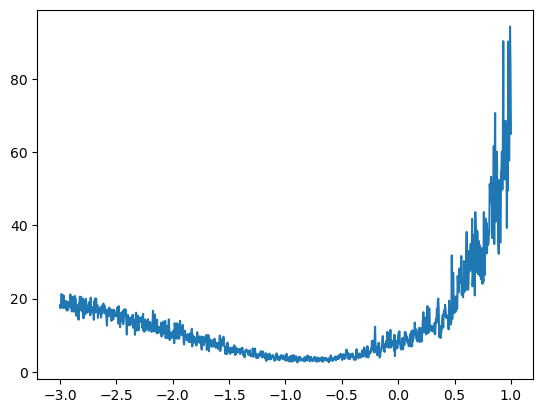

In [ ]:
#|hide
# Use the minimizer here as the starting point
# train until you feel the loss is plateauing
# then decay the learning rate
plt.plot(lrei, lossi)

In [ ]:
block_size = 3 #characters to take as context before predicting the next

X,Y=[],[]
for w in words:
#     print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context))
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
lrei = []
lossi = []
for i in range(20000):
    #  minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-1 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
#     lossi.append(loss.item())
        
print(loss.item()) 

2.3090484142303467


Decay the learning rate

In [ ]:
lrei = []
lossi = []
for i in range(10000):
    #  minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-3 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
#     lossi.append(loss.item())
        
print(loss.item()) 

2.323967933654785


#|hide
03/28/23 Stop at 52:52s / 1:15:39

In [ ]:
#|hide
# Loss on the entire training set
emb = C[X]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.351717472076416


In [ ]:
#build dataset

def build_dataset(words):
    block_size = 3 #characters to take as context before predicting the next

    X,Y=[],[]
    for w in words:
    #     print(w)
        context = [0]*block_size
        for ch in w + '.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
    #         print(''.join(itos[i] for i in context))
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    
    print(X.shape, Y.shape)
    
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

Now train on Xtr,Ytr

In [ ]:
lrei = []
lossi = []
for i in range(30000):
    #  minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-1 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
#     lossi.append(loss.item())
        
print(loss.item()) 

2.3105552196502686


Decay the learning rate

In [ ]:
lrei = []
lossi = []
for i in range(20000):
    #  minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-2 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
#     lossi.append(loss.item())
        
print(loss.item()) 

2.535987615585327


Evaluate on the Dev set

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.32991361618042


## Scale up the neural net

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,300), generator=g) # 300 neurons each taking 6 inputs
b1 = torch.randn((300), generator=g) # the bias for each of the 300 neurons

W2 = torch.randn((300,27), generator=g) # 27 neurons each taking 300 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

print(sum([p.nelement() for p in parameters]))

for p in parameters:
    p.requires_grad = True

10281


In [ ]:
lrei = []
lossi = []
stepi = []
for i in range(30000):
    #  minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-2 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
    lossi.append(loss.item())
    stepi.append(i)
        
print(loss.item()) 

2.2436883449554443


[<matplotlib.lines.Line2D>]

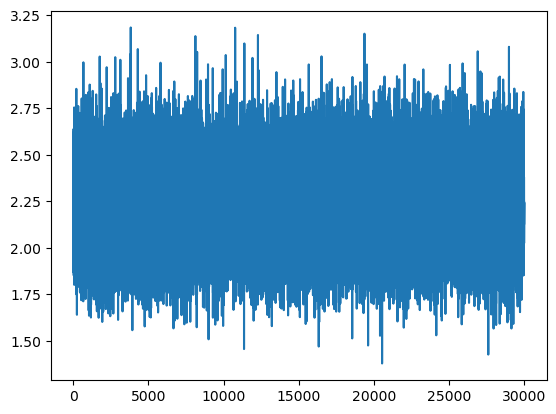

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.228832483291626


## Visualize embedding

Observe how most of the vowels are clustered to the bottom left. q seems to be far and on it's own

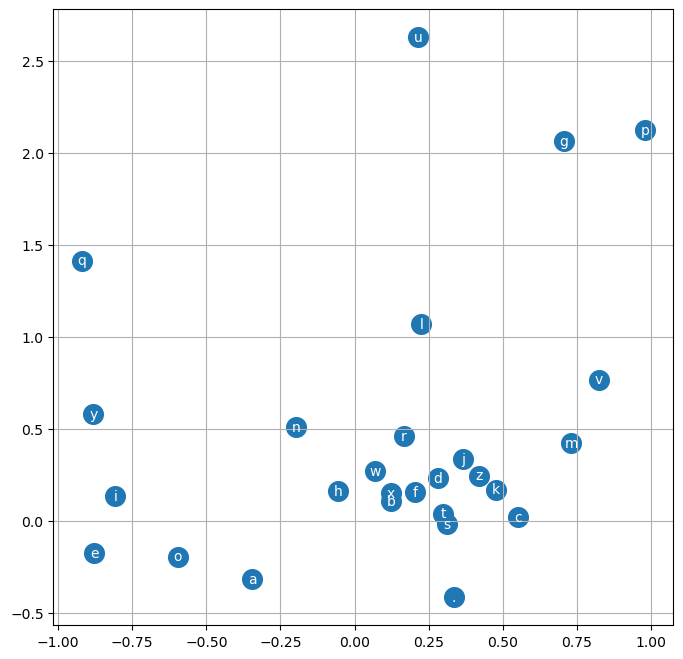

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid("minor")    

## Let's make the embedding vector bigger

This may be the bottleneck to getting a better loss.

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)

W1 = torch.randn((30,200), generator=g) # 200 neurons each taking 30 inputs (10 per character in the context)
b1 = torch.randn((200), generator=g) # the bias for each of the 200 neurons

W2 = torch.randn((200,27), generator=g) # 27 neurons each taking 200 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

print(sum([p.nelement() for p in parameters]))

for p in parameters:
    p.requires_grad = True

11897


In [ ]:
lrei = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):
    #  minibatch construct
    ix = torch.randint(0,Xtr.shape[0],(32,))
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,30)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-1 if i < 100000 else 10**-2 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
    lossi.append(loss.log10().item()) #track log loss for o/w plot has a hockey stick shape
    stepi.append(i)
        
print(loss.item()) 

1.8843928575515747


[<matplotlib.lines.Line2D>]

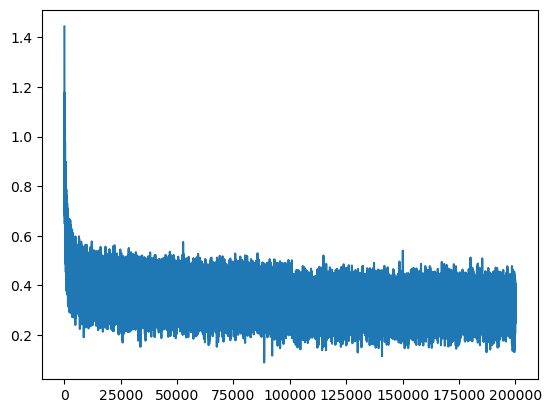

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view((-1,30)) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1519885063171387


##  Sample from the model

In [ ]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out=[]
    context = [0]*block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view((1,-1)) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join([itos[i] for i in out]))

carmahzari.
harli.
jorri.
taty.
ska.
sane.
mahnen.
delyah.
jareei.
ner.
kiah.
maiir.
kaleigh.
ham.
jorn.
quintis.
lilea.
jadzi.
wajerma.
jarysi.


# Next steps

* Beat 2.17 validation loss. Some ideas:
    * change context size
    * number of neurons in hidden layer
    * embedding size
    * batch size
    * learning rate and decay
* Read the paper